In [ ]:
"""
Q: "Given the data set, do a quick exploratory data analysis to get a feel for the distributions and biases of the data.  
Report any visualizations and findings used and suggest any other impactful business use cases for that data."

A: In order to gain insights from the dataset, a series of histograms were generated for individual parameters: Year, Major, Time, and University. 
These visualizations provide valuable information about the ordering patterns of "FoodX" customers.

The Year_Hist indicates that the primary consumers of "FoodX" are almost exclusivly Sophomores and Juniors. Time_Hist exhibits a bell curve 
shape centered around 12 and 13, with fewer orders during the times of 8, 9, 16, and 17. Univ_Hist reveals that the major consumers of "FoodX"
are from Ball State, Butler, and ISU. A secondary group of moderate consumers come from IUPUI (RIP), Evansville, and ND. Following this, there is a
group with almost no consumers, consisting of Depauw, IU, PU, and Valparaiso. Major_Hist displays a similar stratification as Univ_Hist, with 5 groups 
having high demand, 5 with moderate demand, and 10 others with minimal demand.

It's important to note that this dataset solely represents undergraduate college students. Caution should be exercised when extrapolating these 
findings to other demographics, as non-undergraduate students may exhibit different behaviors and preferences.

One plausible business decision is to apply more marketing to the groups of students who have minimal demand such as those with majors of "Fine Arts", 
"Music", or "Civil Engineering". This idea could further be extended to better target groups from universities or grades that exhibit lower demand. One 
might consider using the lowered demand during the times of 8, 9, 16, 17 as justification to reduce the hours of operation of the food truck, 
however as this is not a entirely representative sample of all consumers this should be avoided without further research.
"""

"""
Q: "Consider implications of data collection, storage, and data biases you would consider relevant here considering Data Ethics, 
Business Outcomes, and Technical Implications"

A: It is critical to recognize that by attempting to use this data to predict a consumers order choice it assumes that their order
is a function of at least the time of day, their major, their grade level and their university. However, it is possible that these pieces
of data do not have any true predictive power and any results interpreted from this data would fail to be replicated given another set of 
similar data collected over a different period. 

The data also has volunteer bias as a consumer is not required to use the app to place a order. So, any decisions made from this data only
apply to undergraduate consumers who used the app and filled out the neccisary information.

If 'FoodX' wishes to scale their data collection to be more representative of their consumer base they would first need to consider how they
are going to store the additional data while also ensuring they are sourcing their data in an ethical way. This involves being 
transparent with customers and asking for consent before collecting data and storing data in a secure manor to safe guard customers data.

If 'FoodX' scales their data collection they may be able to produce a more generalizable predictive model that can be applied to more than just 
undergraduate consumers. This will likely boost the overall accuracy and help reduce the number of discounts needed to be given out.
"""


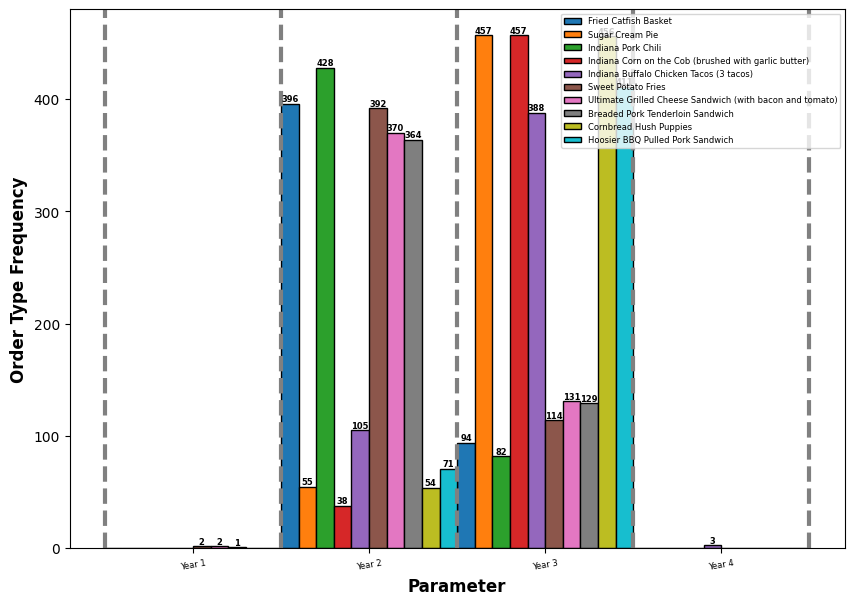

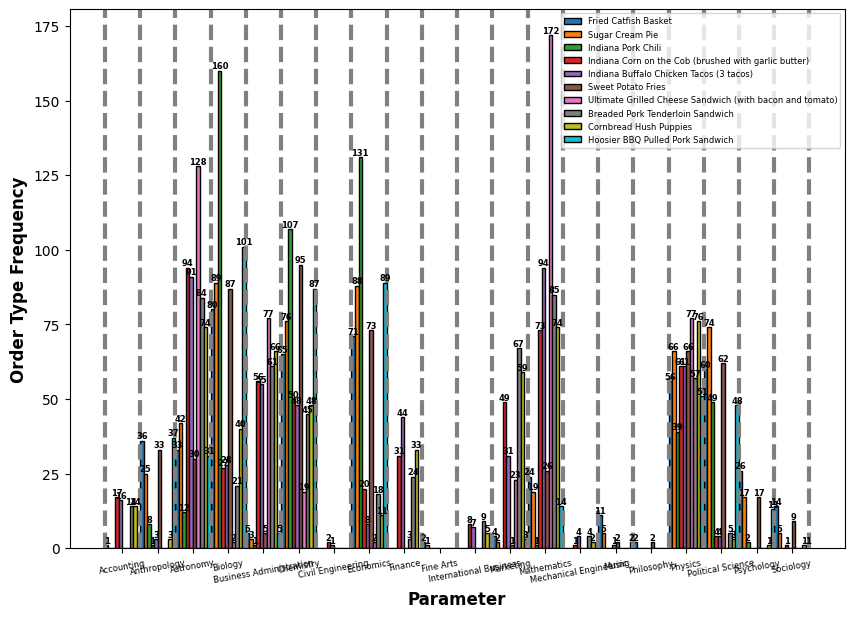

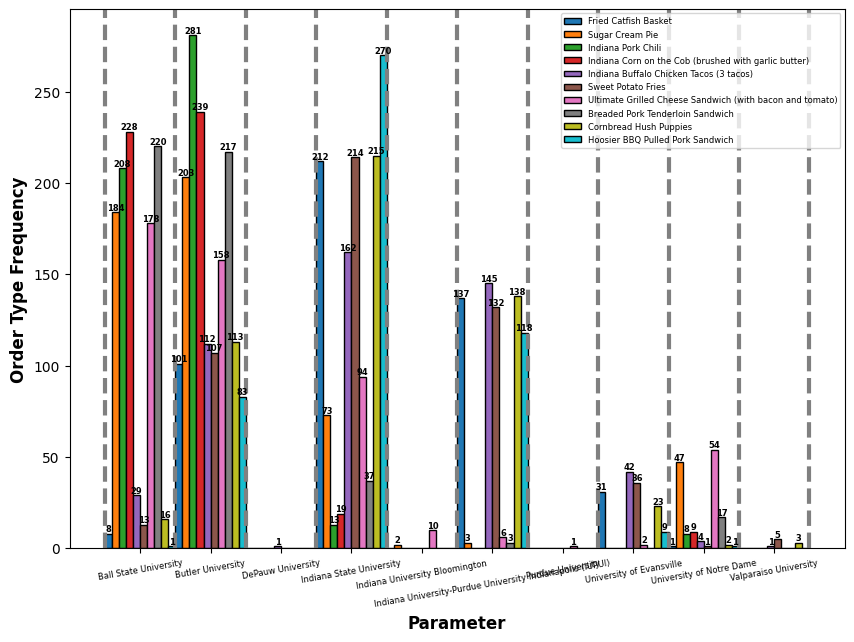

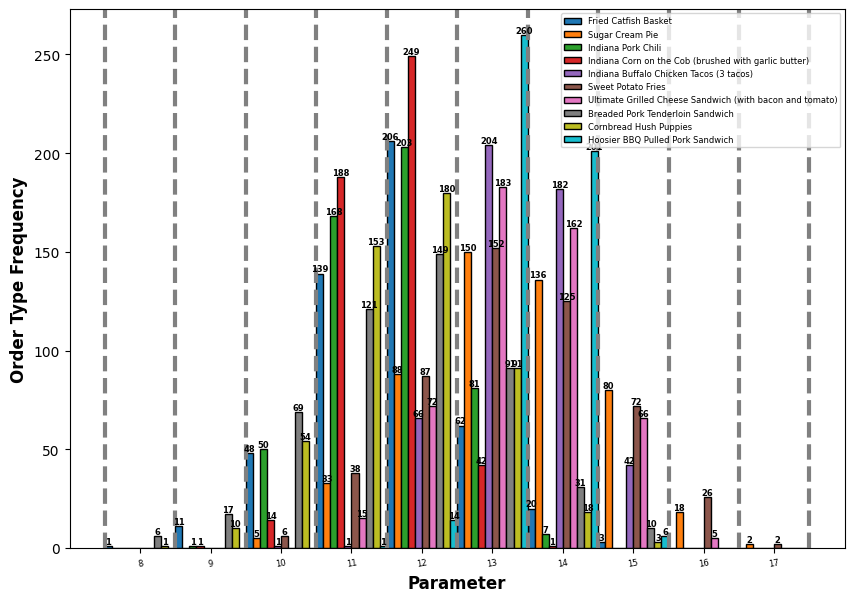

In [1]:
"""
The following produces histograms for the various parameters (Year, Major, Univ, Time) where each parameter has a series of bars 
each representing the freq the different order types apear for the parameter.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('XTern 2024 Artificial Intelegence Data Set.xlsx')

order_types = df["Order"].unique()
cols_to_analyze = list(df.columns)
cols_to_analyze.remove("Order")
bar_width = .1

# Each iteration creates a new graph for Year, Major, Univ, Time
for col in cols_to_analyze:

    ## Find the Frequency that some parameter (Year, Major, ...) results in some order 
    cols_freq = [] #[[int, ...], ...] where each sub array is the column to be displayed, and each int represents the freq of each sub bar
    unique_values = list(df[col].unique()) # ex: [Year 1, Year 2, ...]
    unique_values.sort()

    N = len(unique_values) # number of columns to display in bar graph

    for val in unique_values:
        indexes = df.index[df[col] == val].tolist()
        corresponding_orders = list(df.loc[indexes, "Order"])

        sub_bars = [corresponding_orders.count(order_type) for order_type in order_types]
        cols_freq.append(sub_bars)

    ## Graph the bar chart
    fig, ax = plt.subplots(figsize=(10,7))  

    pos = np.arange(N) # position of the bars on the x-axis

    # Convert into numpy array for easier iterations
    cols_freq = np.array(cols_freq)

    for i in range(len(cols_freq[0])):
        plt.bar(pos, cols_freq[:, i], width=bar_width, edgecolor="black", label=order_types[i])

        # Add text above the bars displaying their freq
        for ind, p in enumerate(pos):
            freq = cols_freq[:, i][ind]
            if freq != 0:
                ax.text(p, freq + 0.05, str(freq), ha='center', va='bottom', fontsize=6, fontweight='bold')

        # Update the position of the bars for the next set of bars
        pos = [p + bar_width for p in pos] 

    plt.xlabel('Parameter', fontweight='bold', fontsize=12) 
    plt.ylabel('Order Type Frequency', fontweight='bold', fontsize=12) 
    
    # Set x-axis ticks and add dividing lines
    ax.set_xticks([p - .55 for p in pos])
    ax.set_xticklabels(unique_values, rotation=10, fontsize = 6)
    for i in range(-1, N):
        ax.axvline((i+.95) * bar_width * len(order_types), color='gray', linestyle='--', linewidth=3)

    plt.legend(fontsize = 6)

plt.show()

In [ ]:
"""
Q: "Outline your process for model selection, training and testing. Including data preparation."

A: Due to the requested output "Orders" being a discrete quantity the classification model KNN was chosen. KNN was further chosen as this dataset has only a few 
features (4) and is relatively small in terms of number of datapoints (5000 per feature). This model seemed additionally appealing as through initial analysis of the
provided dataset a linear pattern or gaussian pattern did not seem apparent.

Once the model was selected the dataset needed to be cleaned into a machine-readable format. No normalization was required for this algorithm so each of the discrete text
values were converted into unique numerical equivalents (ex. Year 1 -> 0, Year 2 -> 1, ...). From here the best value for k_neighbors needed to be selected empirically. 
To accomplish this a 5 folds kFolds test with an 80-20 train-test split was implemented to test the range of k values from 1 to 70. The range 1-70 was selected to ensure 
a strong pattern was discovered for the k-values. This solution is shown in "Section 1" and the results of the various k values is illustrated in the file "best_k_1_to_70.png".

From here the model could be retrained with 100% of the dataset with the k value of 10, which was the k value that resulted in the highest accuracy and the lowest MSE from the
1-70 test. This model can then be used to make predictions on new given datapoints, this process is shown in "Section 3". 
"""

"""
Q: "Given the work required to bring a solution like this to maturity and its performance, what considerations would you make to determine if this is a suitable course
of action"

A: This model is able to achieve approximately 63% to 67% accuracy based on the results shown in "Section 2" and "Section 4". While this accuracy is greater than 
simply guessing it would still result in around 33% to 37% of customers gaining a 10% discount. Whether this is sufficient or not depends on the impact this discount
will have on the business and whether this represents a strong enough improvement over the ability of employees to guess orders.

If the achieved 63-67% accuracy is not sufficient then this is likely not a suitable course of action. Further if the individuals collecting the data believe they will 
begin collecting a larger variety of data types such as age, dietary restrictions, past orders, etc... then a different model may be needed due to limitations of KNN 
as the number of parameters (dimensions) begins to increase.
"""


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class PredictiveModel:

    def load_dataset(self, file_path):
        """
        Loads the data held in the provided file_path and then prepares the data for ML use
        NOTE: each assigned index to replace the text is based on an alphabeticized list 
              ex. Year 1 -> 0, Year 2 -> 1, ...

        Args:
        @file_path: str

        Returns
        * Pandas DataFrame 
        * [[original unique val from data, ...], ...] -> the indexes for any given array correspond to the values after conversion
        """
        df = pd.read_excel(file_path)

        cols = list(df.columns)
        conversion_lookup = []

        for col in cols:
            unique_items = list(df[col].unique())
            unique_items.sort()
            conversion_lookup.append(unique_items)

            for i, item in enumerate(unique_items):
                df.loc[df[col] == item, col] = i

        return df, conversion_lookup

    def split_train_test(self, df, train_ratio, test_ratio):
        """
        Splits the df into a train and test data set based on the provided split percentages

        Args:
        @df: Pandas DataFrame
        @train_ratio: float
        @test_ratio: float

        Returns:
        * Tuple of DataFrames (X_train, X_test, y_train, y_test)
        """
        from sklearn.model_selection import train_test_split

        X_train, X_test, y_train, y_test = train_test_split(df, train_size=train_ratio, test_size=test_ratio, random_state=42)
        return X_train, X_test, y_train, y_test
    
    def compare_k_neighbors(self, df, k_neighbors, folds = 5):
        """
        Compares the various k_neightbors making use of a kFolds and the list of k and the models resulting MSE, Accuracy

        Args:
        @df: Pandas DataFrame
        @k_neighbors: [int, ...]
        @folds: int

        Returns:
        * [MSE, ... for each k_neightbor], [Accuracy, ... for each k_neighbor]
        """
        # Last column is the target variable and the rest are features
        X = df[["Year", "Major", "University", "Time"]].values.astype('int')
        y = df["Order"].values.astype('int')

        mse_list = []
        accuracy_list = []

        kf = KFold(n_splits=folds, shuffle=True, random_state=42)

        for k in k_neighbors:
            mse_fold_scores = []
            accuracy_fold_scores = []

            knn = KNeighborsClassifier(n_neighbors=k)

            # Train and validate the model using k-fold cross-validation
            for train_index, test_index in kf.split(X):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]

                knn.fit(X_train, y_train)

                # Predict on the test set
                y_pred = knn.predict(X_test)

                # Calculate MSE
                mse = mean_squared_error(y_test, y_pred)
                mse_fold_scores.append(mse)

                # Evaluate the model (optional)
                accuracy = knn.score(X_test, y_test)
                accuracy_fold_scores.append(accuracy)

            # Calculate the average MSE and Accuracy for this k
            avg_mse = np.mean(mse_fold_scores)
            avg_accuracy = np.mean(accuracy_fold_scores)

            mse_list.append(avg_mse)
            accuracy_list.append(avg_accuracy)

        return mse_list, accuracy_list
    
    def set_model(self, df, k):
        """
        Args:
        @df: Pandas DataFrame
        @k: int -> k_neighbors
        """
        X = df[["Year", "Major", "University", "Time"]].values.astype('int')
        y = df["Order"].values.astype('int')

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X, y)

        self.model = knn

    def convert_point(self, point, conversion_lookup, to_str = True):
        """
        Convert a point from algo ready integers back to corresponding text or vice versa

        Args:
        @point: [(int or str) for Year, (int or str) for Major, (int or str) for Univ, (int or str) for Time, (int or str) for Order]
        @conversion_lookup: [[unique values for Year, ...], ...]
        @to_str: True or False -> to convert from int to str (True) or str to int (false)

        Returns:
        * [(int or str) for Year, (int or str) for Major, (int or str) for Univ, (int or str) for Time, (int or str) for Order]
        """
        converted_pt = []
        if to_str:
            for i, p in enumerate(point):
                converted_pt.append(conversion_lookup[i][p])
        else:
            for i, p in enumerate(point):
                converted_pt.append(conversion_lookup[i].index(p))

        return converted_pt
    
    def predict(self, point):
        """
        Based on the set model finds the predicted value for the new point

        Assumes
        * a model has been set

        Args:
        @point: [int for Year, int for Major, int for Univ, int for Time] 

        Returns:
        * int for Order 
        """
        return self.model.predict([point])[0]

pred_model = PredictiveModel()
df, conversion_lookup = pred_model.load_dataset('XTern 2024 Artificial Intelegence Data Set.xlsx')

c:\Users\ericc\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


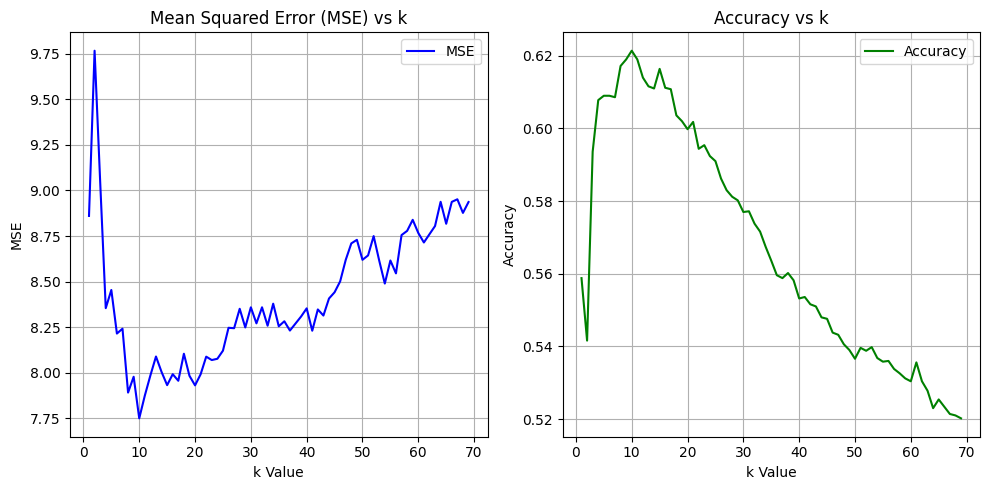

Best K: 10 and Best MSE: 7.750400000000001


In [7]:
"""
Section 1. Proves 10 is the best k value, see best_k_1_to_70.png
WARNING: slowish
"""
k_neighbors_range = list(range(1, 70)) 
mse_list, acc_list = pred_model.compare_k_neighbors(df, k_neighbors_range)

#Graph Both MSE, Accuracy
plt.figure(figsize=(10, 5))

# Plot MSE
plt.subplot(121)  # 1 row, 2 columns, 1st position
plt.plot(k_neighbors_range, mse_list, label="MSE", color='blue')
plt.title("Mean Squared Error (MSE) vs k")
plt.xlabel("k Value")
plt.ylabel("MSE")
plt.grid(True)
plt.legend()

# Plot Accuracy
plt.subplot(122)  # 1 row, 2 columns, 2nd position
plt.plot(k_neighbors_range, acc_list, label="Accuracy", color='green')
plt.title("Accuracy vs k")
plt.xlabel("k Value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the figures
plt.show()

best_mse = min(mse_list)
best_k = k_neighbors_range[mse_list.index(best_mse)]

print(f"Best K: {best_k} and Best MSE: {best_mse}")

In [4]:
"""
Section 2. Finds the best MSE and Accuracy for kFolds = 10 -> MSE = 7.7 Acc = 63%
"""
k_neighbors_range = [10] 
mse_list, acc_list = pred_model.compare_k_neighbors(df, k_neighbors_range, folds = 10)

best_mse = min(mse_list)
best_acc = max(acc_list)
best_k = k_neighbors_range[mse_list.index(best_mse)]

print(f"Best K: {best_k}, Best MSE: {best_mse}, Best Accuracy: {best_acc}")

Best K: 10 and Best MSE: 7.704000000000001, Accuracy: 0.6302000000000001


In [5]:
"""
Section 3. Example use for predicting new points
"""
#train the model
pred_model.set_model(df, k = 10)

#get the prediction
pt = ["Year 2", "Physics", "Indiana State University", 12]
formated_pt = pred_model.convert_point(pt, conversion_lookup, to_str=False)
prediction = pred_model.predict(formated_pt)

#format the prediction to viewable form
formated_pt.append(prediction)
final_pt = pred_model.convert_point(formated_pt, conversion_lookup, to_str=True)
print(final_pt)

['Year 2', 'Physics', 'Indiana State University', 12, 'Fried Catfish Basket']


In [6]:
"""
Section 4. Example finding the Accuracy of the trained model compared to existing data
-> 66.52%
"""
#train the model
pred_model.set_model(df, k = 10)

#get the prediction
pts = df[["Year", "Major", "University", "Time"]]

# Get the predictions for each data point in 'pts'
predictions = []
for idx, row in pts.iterrows():
    #formated_pt = pred_model.convert_point(row.tolist(), conversion_lookup, to_str=False)
    #pts already formated in df
    prediction = pred_model.predict(row.tolist())
    predictions.append(prediction)

# Obtain the true labels from the "Order" column of the DataFrame
true_labels = df["Order"].tolist()

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)

print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 66.52%
